## Notebook settings

In [36]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Imports

In [37]:

import matplotlib.pyplot as plt
import numpy as np
import uproot
import logging
import tpvalidator.workspace as ws
import tpvalidator.utilities as utils
import tpvalidator.analyzers.snn as snn

from rich import print
from tpvalidator.utilities import temporary_log_level, subplot_autogrid
from tpvalidator.histograms import uproot_hist_mean_std


# Load ADC mean and standard deviation from wafevorm histograms

In [38]:
pool=None
with temporary_log_level(ws.TriggerPrimitivesWorkspace._log, logging.INFO):
    tpws = ws.TriggerPrimitivesWorkspace("../data/vd/bkg/100events/tptree_st_tpg_vd_radiols.root ")

print(tpws.info)

{
    'geo': {'detector': 'dunevd10kt_3view_30deg_v5_refactored_1x8x6ref'},
    'mc_generator_labels': [
        'CavernNGammasAtLAr1x8x6',
        'Rn222ChainBi214GenInLAr',
        'Rn222ChainFromBi214GenInUpperMesh1x8x6',
        'Th232ChainGenInAnode',
        'CavernwallGammasAtLAr1x8x6',
        'Rn222ChainFromPb210GenInUpperMesh1x8x6',
        'Rn222ChainFromPb214GenInUpperMesh1x8x6',
        'Rn222ChainPo218GenInLAr',
        'Rn222ChainPb214GenInLAr',
        'Ar39GenInLAr',
        'Rn222ChainPb210GenInLAr',
        'Rn222ChainFromPo218GenInUpperMesh1x8x6',
        'Rn222ChainFromBi210GenInUpperMesh1x8x6',
        'Ar42GenInLAr',
        'Rn222ChainGenInPDS',
        'K42From42ArGenInLAr',
        'Rn220ChainPb212GenInLAr',
        'CavernwallNeutronsAtLAr1x8x6',
        'K40GenInAnode',
        'U238ChainGenInCathode',
        'Rn222ChainRn222GenInLAr',
        'Th232ChainGenInCathode',
        'K42From42ArGenInUpperMesh1x8x6',
        'foamGammasAtLAr1x8x6',
        'K40GenInCathode',
        'U238ChainGenInAnode',
        'Kr85GenInLAr',
        'CryostatNGammasAtLAr1x8x6',
        'Rn220ChainFromPb212GenInUpperMesh1x8x6'
    ],
    'tpg': {
        'threshold_tpg_plane0': 23,
        'threshold_tpg_plane1': 23,
        'threshold_tpg_plane2': 26,
        'tool': 'TPAlgTPCSimpleThreshold'
    },
    'tptree': {'U_window_offset': 8, 'V_window_offset': 1, 'X_window_offset': -7}
}

In [39]:
tpws.add_rawdigits('../data/vd/bkg/100events/trigger_digits_waves_detsim_vd_radiols.root')

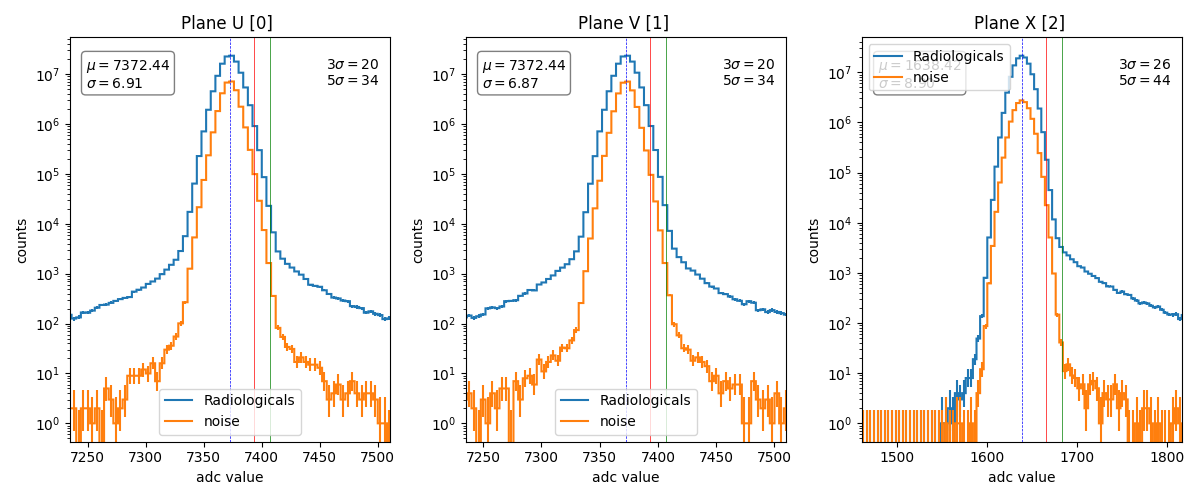

In [40]:
fig = snn.draw_signal_and_noise_adc_distros(tpws, signal_label='Radiologicals')
fig.tight_layout()

# TP sample validation
## Distribution of point of origin in the detector

In [41]:
all_tps = snn.TPSignalNoisePreSelection(tpws.tps)
alltp_ana = snn.TPSignalNoiseAnalyzer(all_tps)

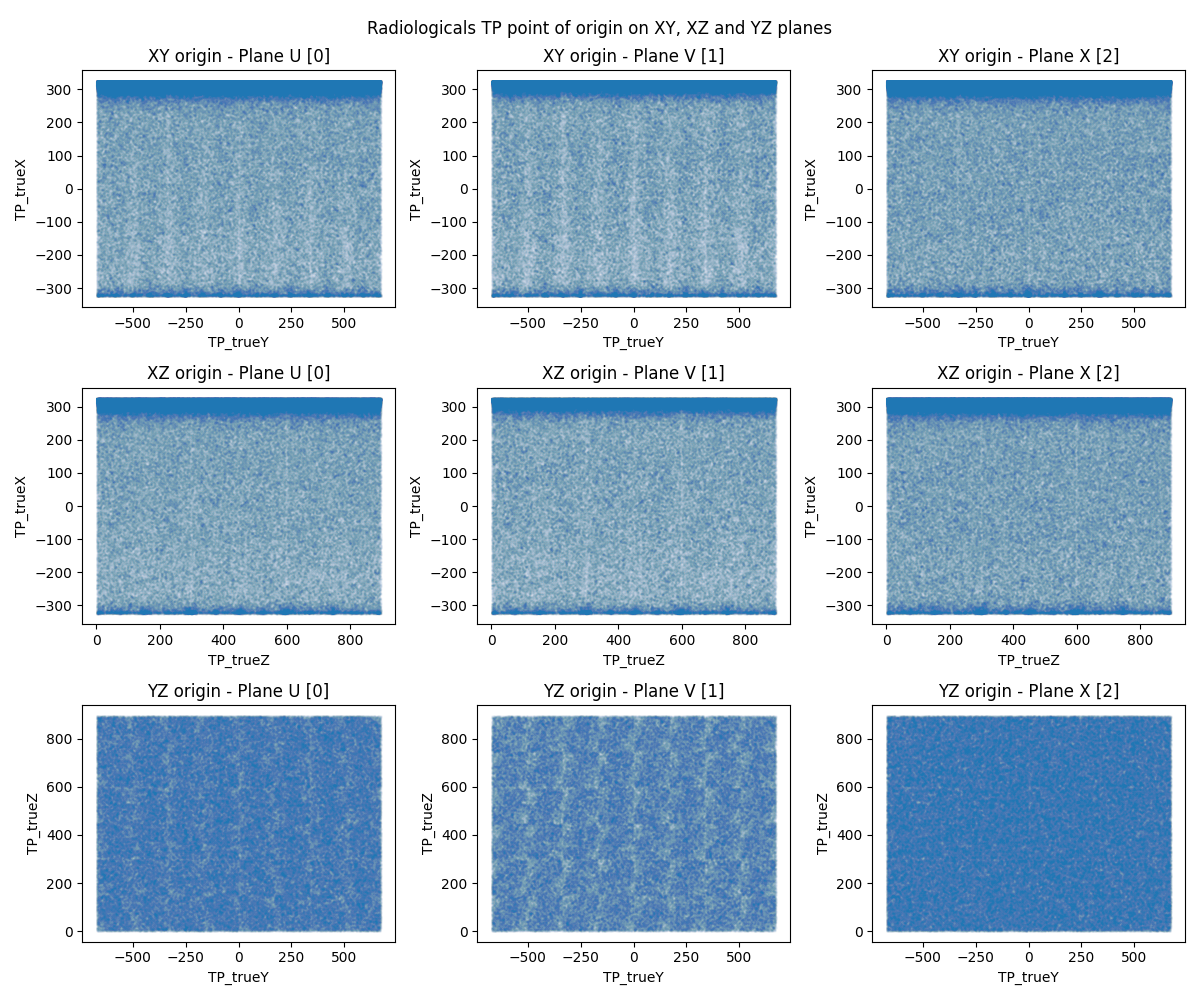

In [ ]:
fig = alltp_ana.draw_tp_sig_origin_2d_dist(signal_label='Radiologicals')
fig.tight_layout()

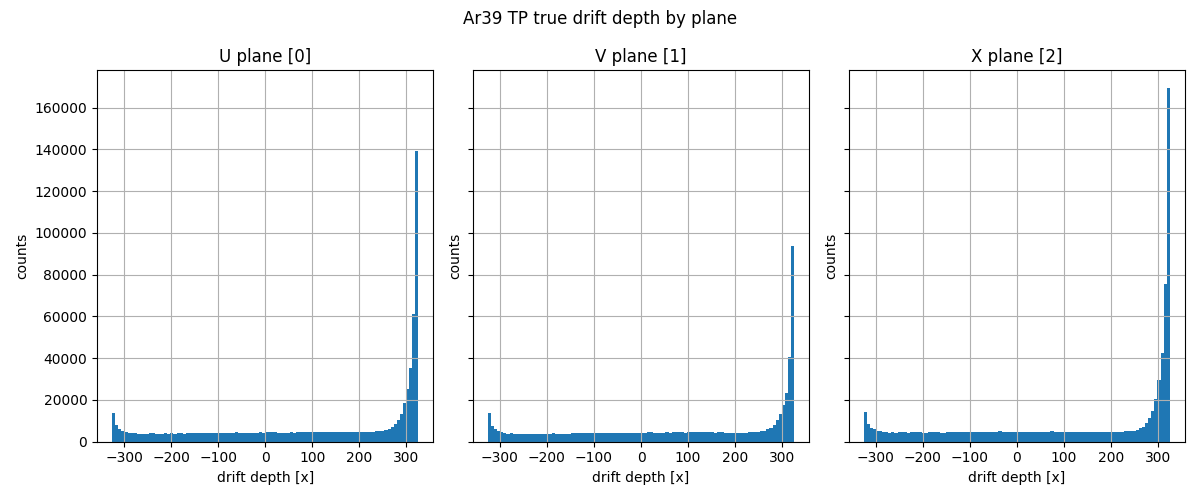

In [ ]:
fig = alltp_ana.draw_tp_sig_drift_depth_dist()
fig.tight_layout()

# Dataset validation: TP distribution in time

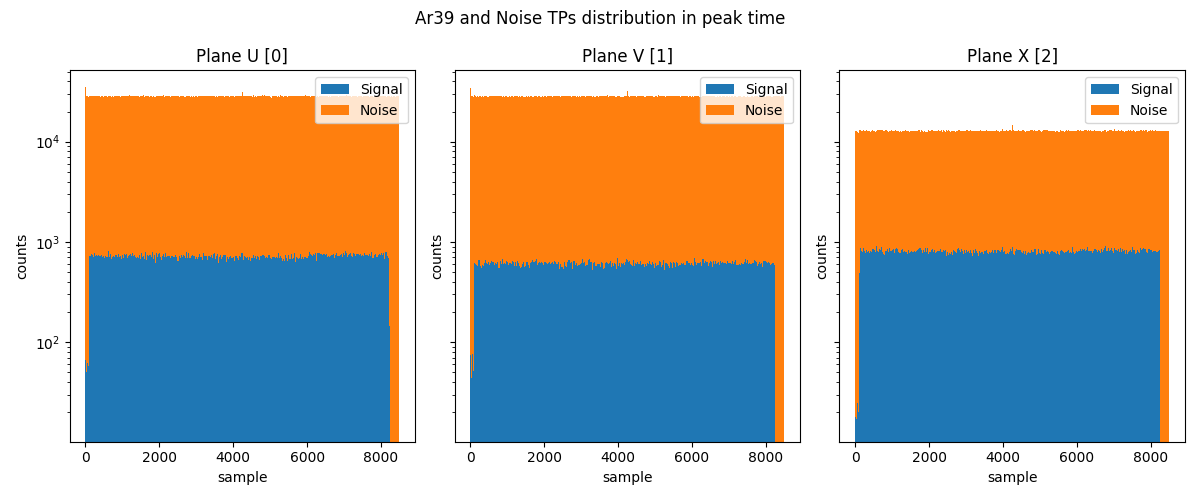

In [44]:
fig = alltp_ana.draw_tp_start_time_dist()
fig.tight_layout()

# Cleaning: removing regions with non-even backtracking efficiency

In [45]:
clean_tps = snn.TPSignalNoisePreSelection(tpws.tps[(tpws.tps.TP_startT >100) & (tpws.tps.TP_startT <8100)])
tp_ana = snn.TPSignalNoiseAnalyzer(clean_tps)

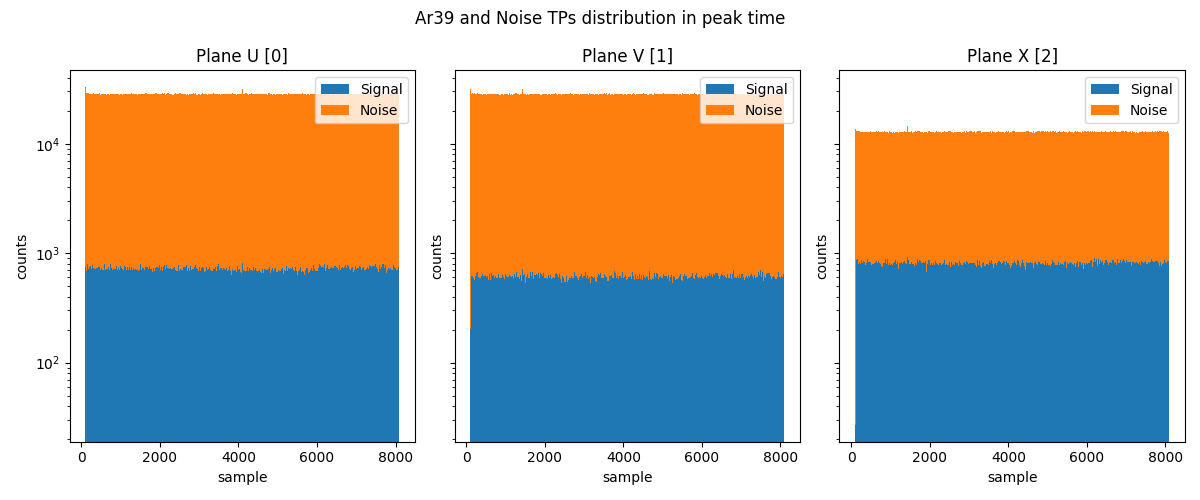

In [46]:
fig = tp_ana.draw_tp_start_time_dist()
fig.tight_layout()

# PeakADC, time-over-threshold and SumADC distribution for Ar39 and noise

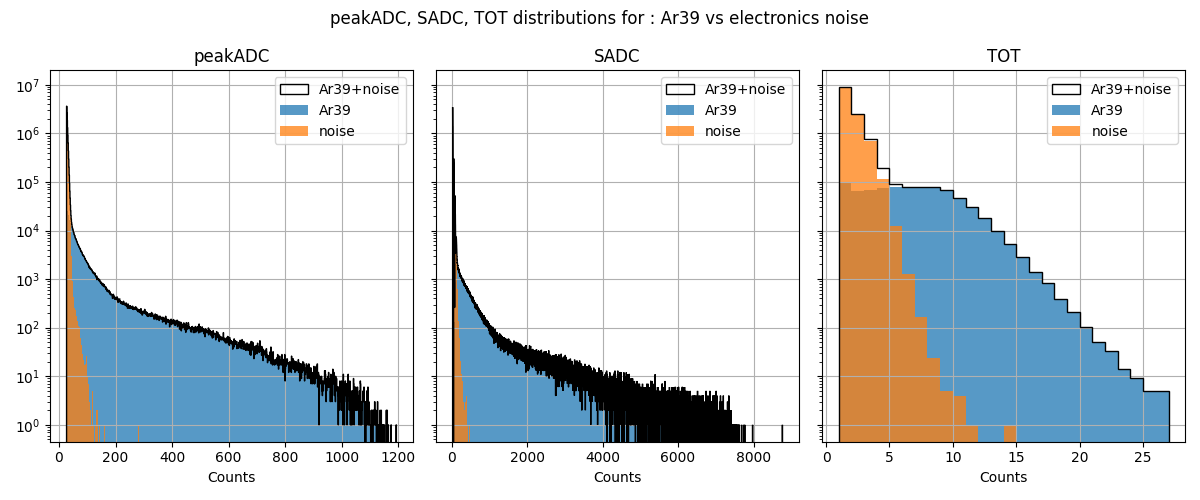

In [47]:
fig = tp_ana.draw_tp_signal_noise_dist()
fig.tight_layout()

/Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/analyzers/snn.py:330: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = tps.sig_p2.groupby(pd.cut(tps.sig_p2.TP_trueX, n_x_bins))


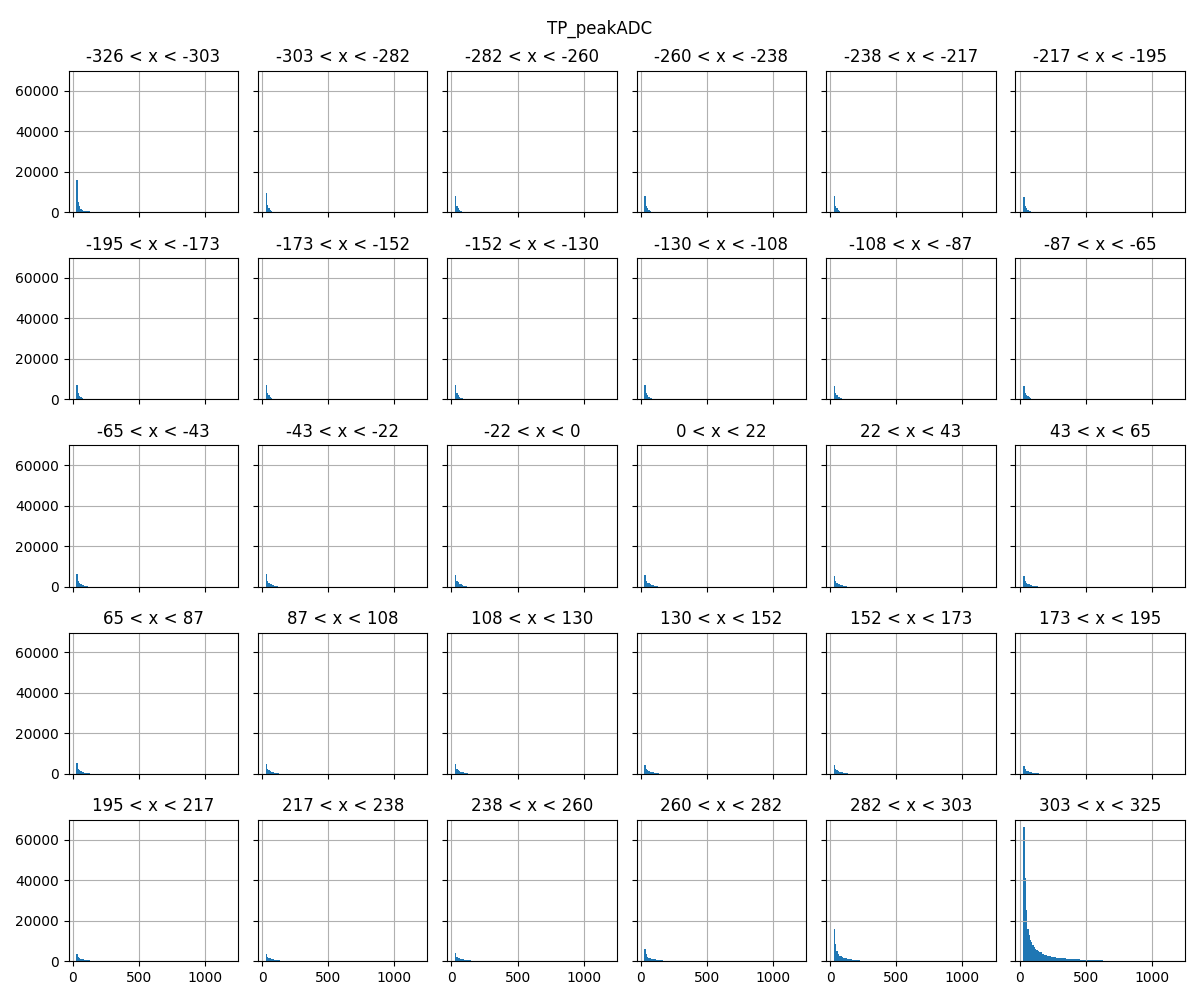

In [48]:
fig = tp_ana.draw_variable_in_drift_grid('peakADC', downsampling=10, sharex=True, sharey=True, figsize=(12,10))
fig.tight_layout()

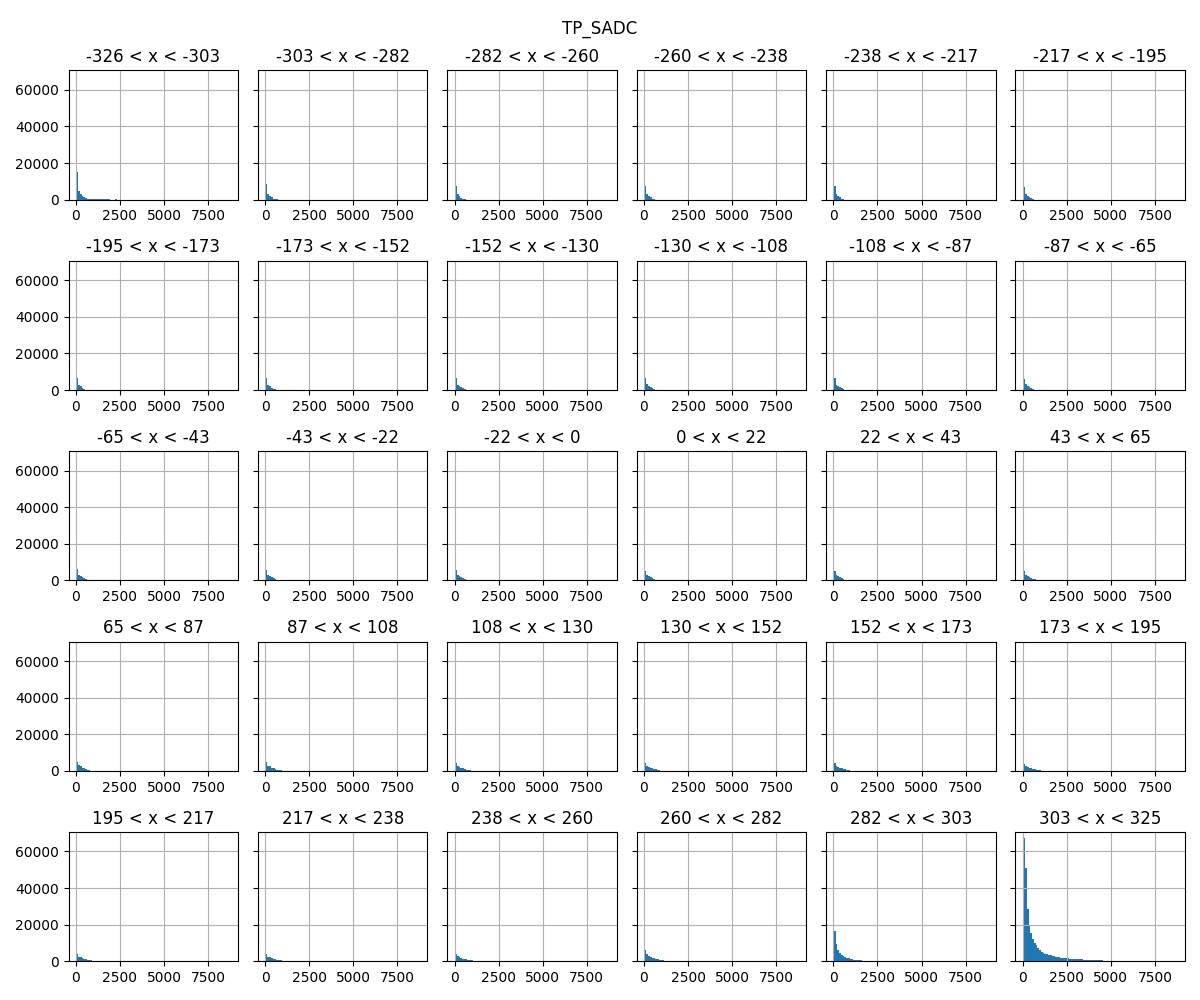

In [49]:
fig = tp_ana.draw_variable_in_drift_grid('SADC', downsampling=100, sharey=True, figsize=(12,10))
fig.tight_layout()

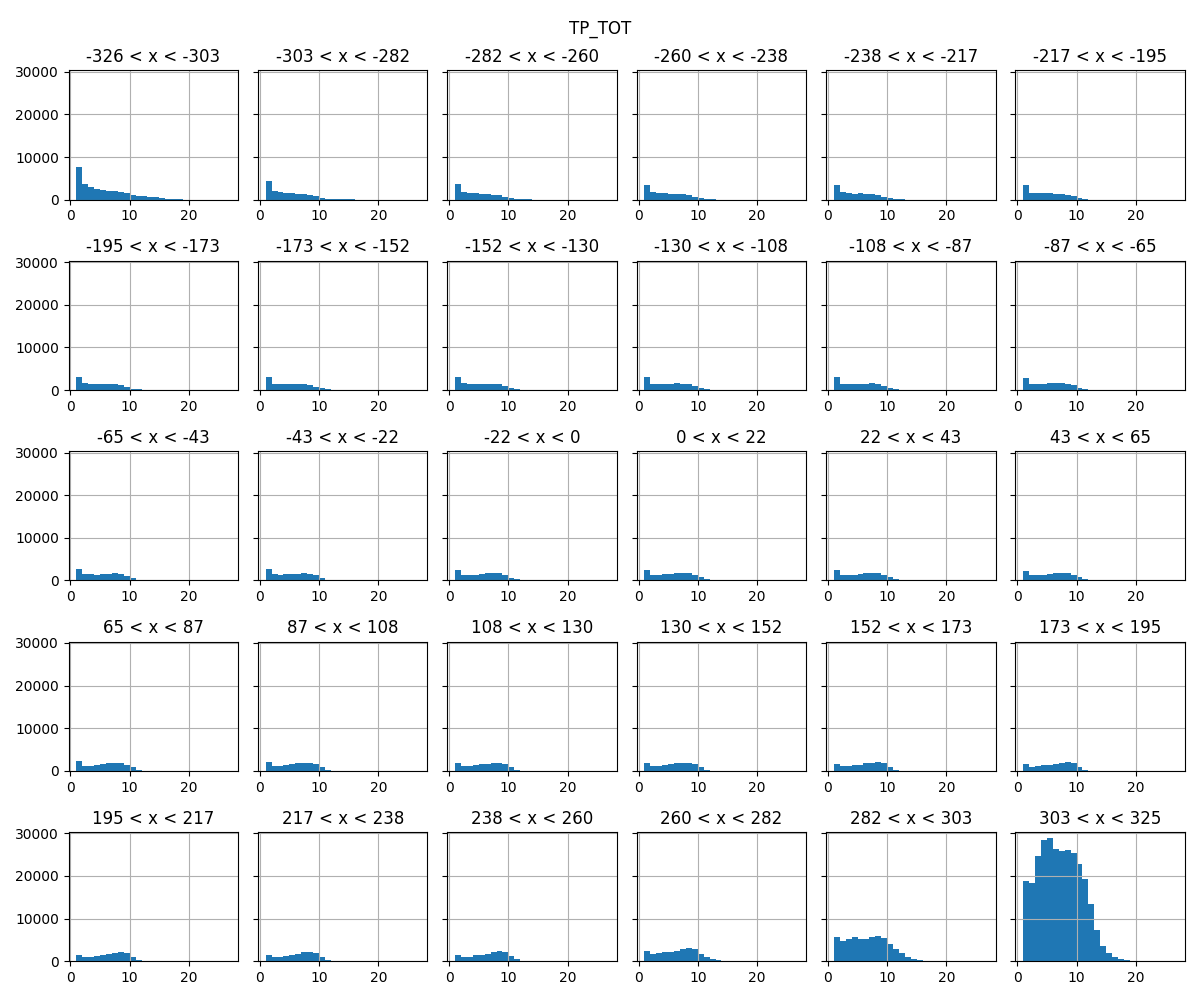

In [50]:
fig = tp_ana.draw_variable_in_drift_grid('TOT', downsampling=1, log=False, sharey=True, figsize=(12,10))
fig.tight_layout()

/Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/analyzers/snn.py:361: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = tps.sig_p2.groupby(pd.cut(tps.sig_p2.TP_trueX, n_x_bins))


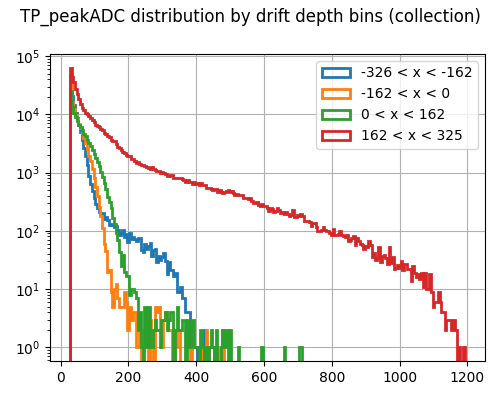

In [51]:
fig = tp_ana.draw_variable_drift_stack('peakADC', downsampling=5, n_x_bins=4, log=True, figsize=(5,4))
fig.tight_layout()

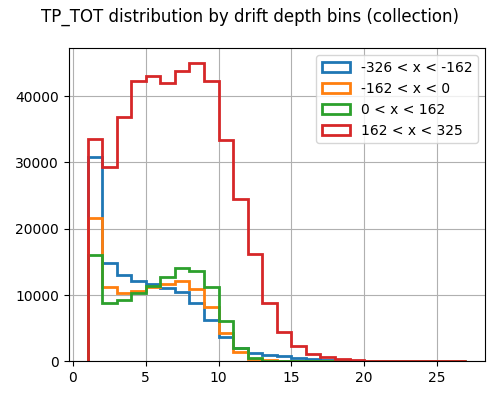

In [52]:
fig = tp_ana.draw_variable_drift_stack('TOT', downsampling=1, n_x_bins=4, log=False, figsize=(5,4))
fig.tight_layout()


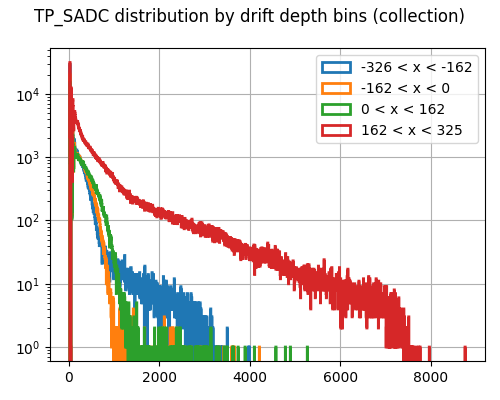

In [53]:
fig = tp_ana.draw_variable_drift_stack('SADC', downsampling=5, n_x_bins=4, log=True, figsize=(5,4))
fig.tight_layout()


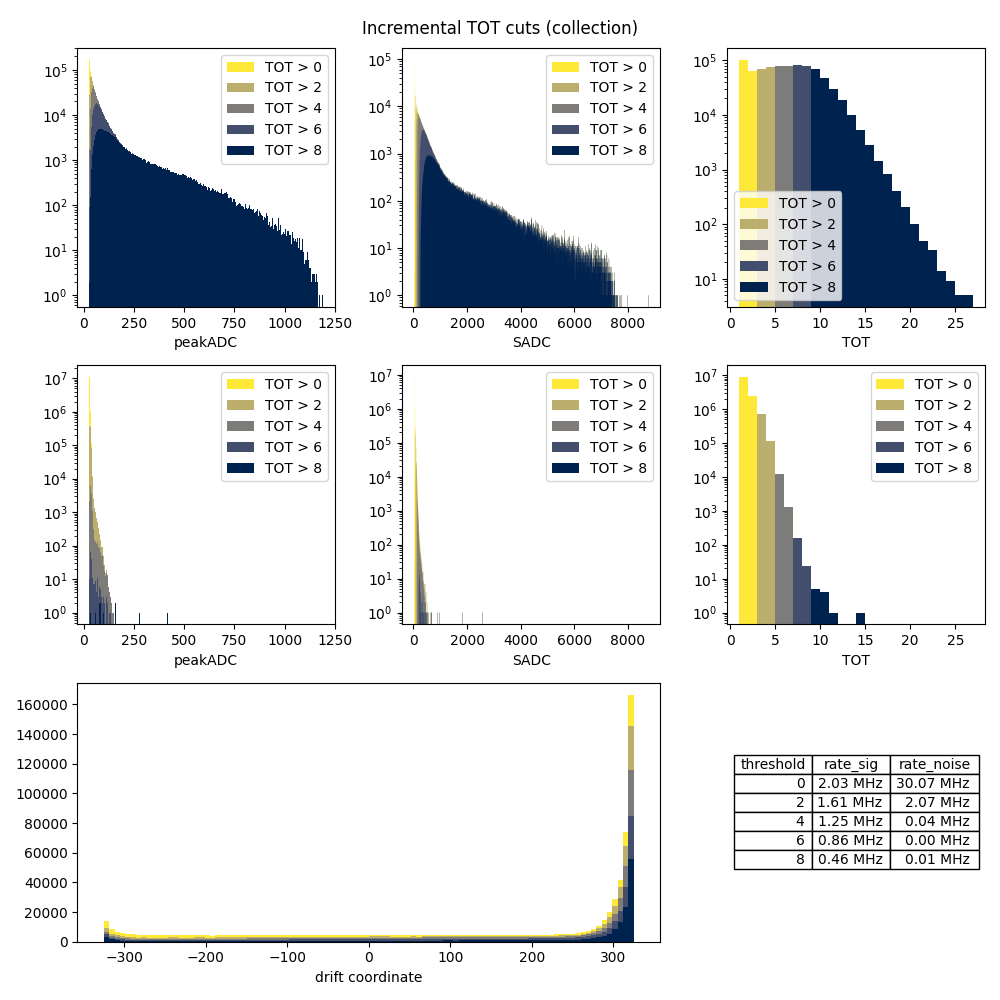

In [54]:
tot_cuts = [t for t in range(0,10,2)]

fig = tp_ana.draw_variable_cut_sequence('TOT', tot_cuts, log=True, figsize=(10,10))
fig.tight_layout()



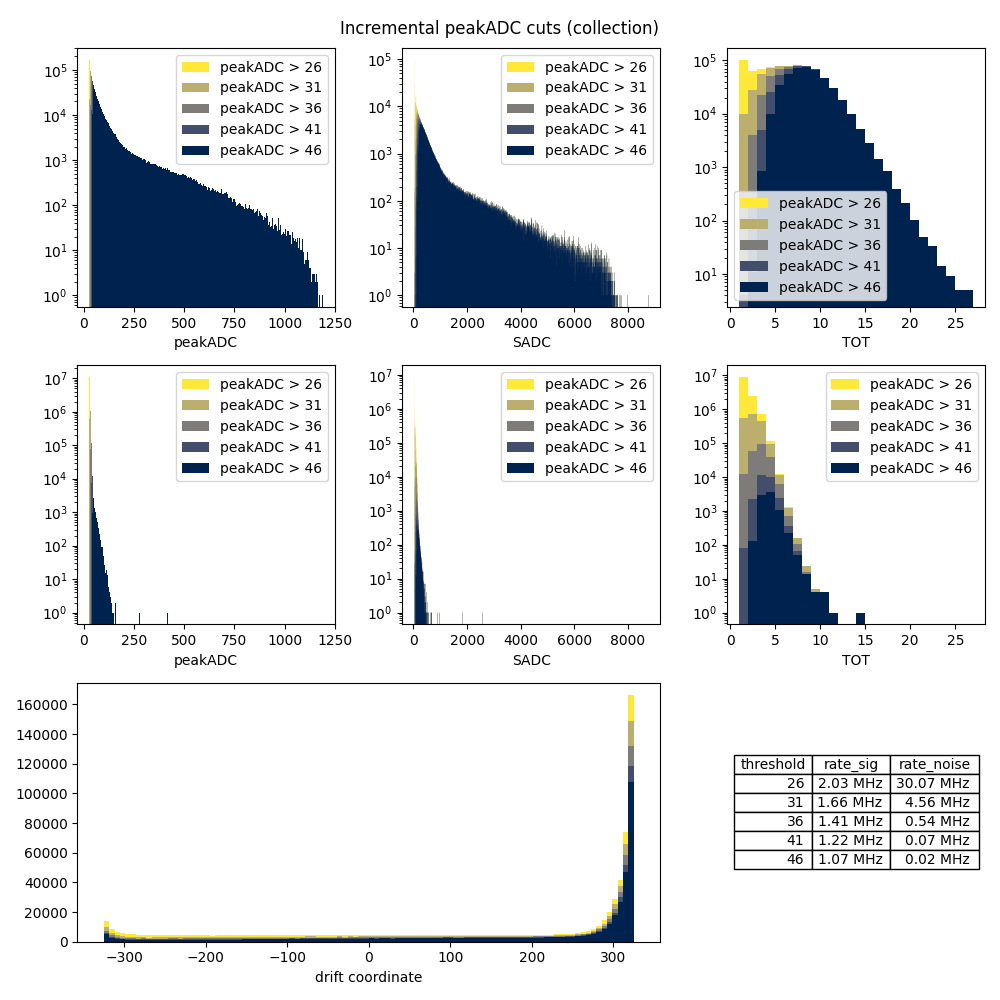

In [55]:
cuts = [t for t in range(26, 50, 5)]

fig = tp_ana.draw_variable_cut_sequence('peakADC', cuts, log=True, figsize=(10,10))
fig.tight_layout()

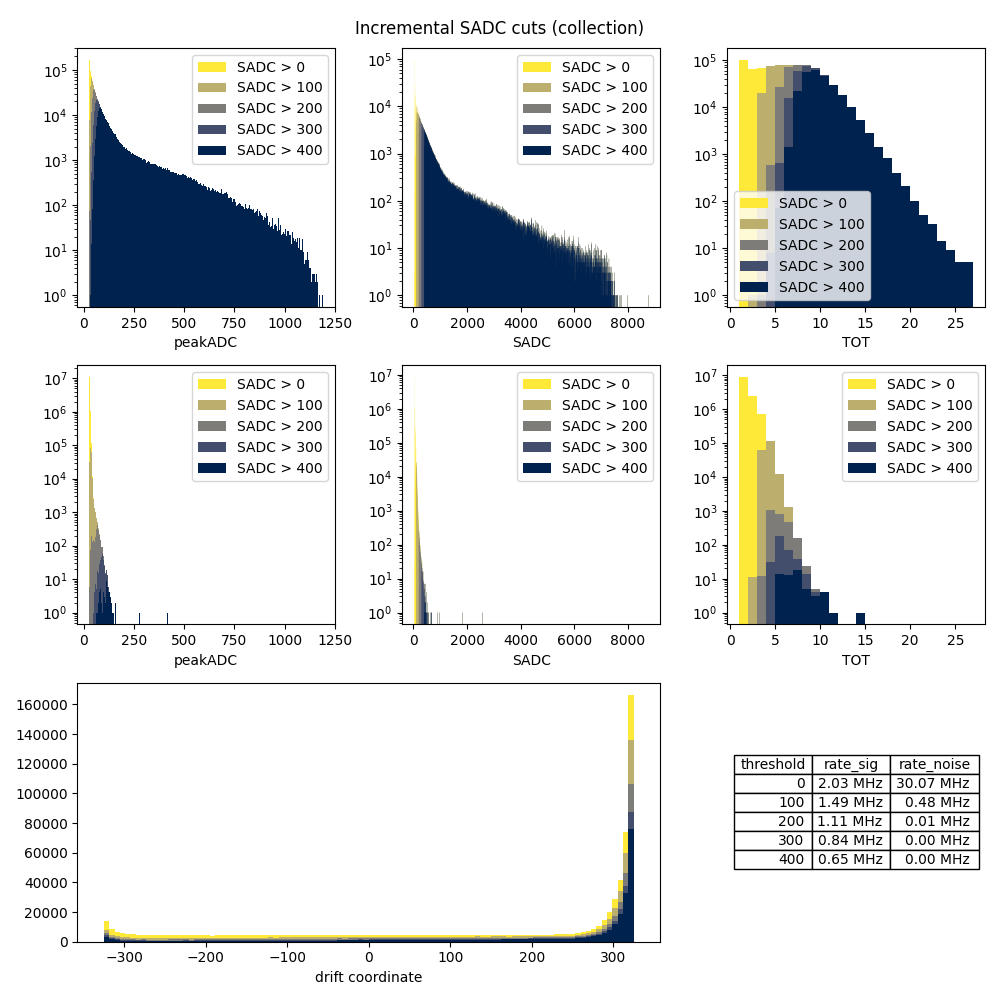

In [56]:
cuts = [t for t in range(0, 500, 100)]

fig = tp_ana.draw_variable_cut_sequence('SADC', cuts, figsize=(10,10), log=True)
fig.tight_layout()

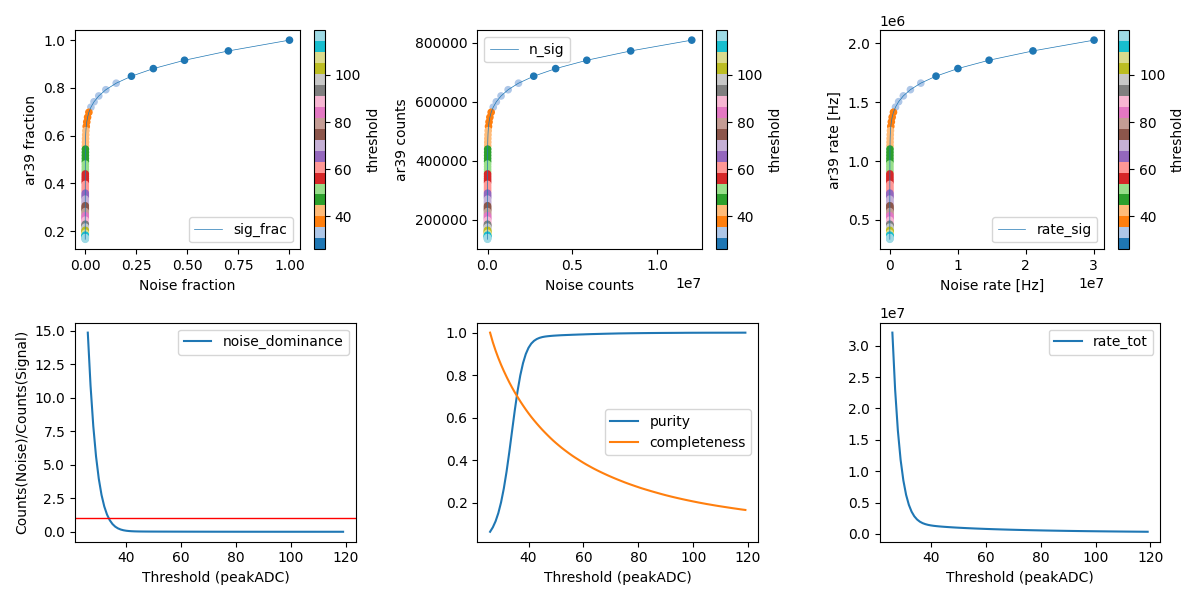

In [57]:
thresholds = [t for t in range(26, 120, 1)]

fig = tp_ana.draw_threshold_scan('peakADC', thresholds)
fig.tight_layout()

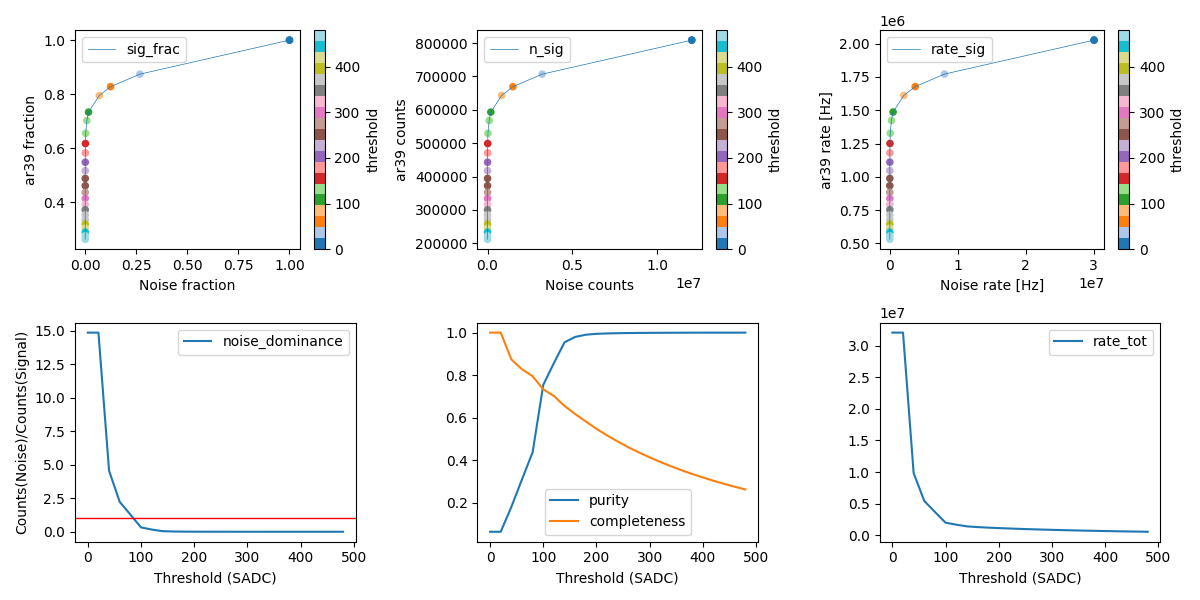

In [58]:
thresholds = [t for t in range(0, 500, 20)]

fig = tp_ana.draw_threshold_scan('SADC', thresholds)
fig.tight_layout()

# Investigating weird TP and IDES distributions

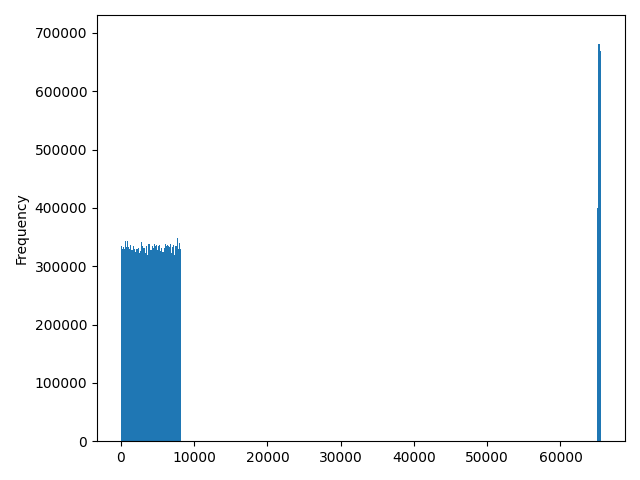

In [59]:
fig, ax = plt.subplots()
tpws.ides.time.plot.hist(bins=1000)
fig.tight_layout()

In [60]:
weird_ides = tpws.ides[tpws.ides.time > 8500]
display(weird_ides)
first_ides = tpws.ides[tpws.ides.time < 100]
display(first_ides)


event       run  subrun  n_ides  channel   time  track_id  \
entry subentry                                                              
0     51            1  20000047       0  461888       36  65337    -48166   
      52            1  20000047       0  461888       36  65349    -48166   
      53            1  20000047       0  461888       36  65351    -48166   
      60            1  20000047       0  461888       40  65399    -48166   
      61            1  20000047       0  461888       41  65388    -48166   
...               ...       ...     ...     ...      ...    ...       ...   
99    472955      100  20000047       0  473043    41460  65237    -44837   
      472956      100  20000047       0  473043    41460  65238    -44837   
      472957      100  20000047       0  473043    41460  65239    -44837   
      472965      100  20000047       0  473043    41461  65237    -44837   
      472966      100  20000047       0  473043    41461  65238    -44837   

                mcgen_key  n_electrons    energy           x           y  \
entry subentry                                                             
0     51                4    88.000000  0.017779  322.472534 -668.242859   
      52                4  2385.000000  0.162189  321.508820 -668.329712   
      53                4     6.000000  0.001979  321.355927 -667.862732   
      60                4   345.000000  0.044059  317.458557 -656.405151   
      61                4  1155.000000  0.097163  318.391541 -655.987183   
...                   ...          ...       ...         ...         ...   
99    472955            4   801.136169  0.055956  278.690643  553.326599   
      472956            4  1509.955566  0.105465  278.690643  553.326599   
      472957            4    96.927666  0.006770  278.690643  553.326599   
      472965            4     7.157655  0.000500  278.690643  553.326599   
      472966            4    13.490518  0.000942  278.690643  553.326599   

                         z  
entry subentry              
0     51         49.114349  
      52         48.737518  
      53         48.299393  
      60         35.540867  
      61         35.095436  
...                    ...  
99    472955    890.280029  
      472956    890.280029  
      472957    890.280029  
      472965    890.280029  
      472966    890.280029  

[5128471 rows x 13 columns]

event       run  subrun  n_ides  channel  time  track_id  \
entry subentry                                                             
0     25            1  20000047       0  461888       27    62    -38621   
      2402          1  20000047       0  461888      210    37     56852   
      2403          1  20000047       0  461888      210    38     56852   
      2404          1  20000047       0  461888      210    39     56852   
      2405          1  20000047       0  461888      210    40     56852   
...               ...       ...     ...     ...      ...   ...       ...   
99    465022      100  20000047       0  473043    40564    18     64020   
      465023      100  20000047       0  473043    40564    19     64020   
      465024      100  20000047       0  473043    40564    20     64020   
      465025      100  20000047       0  473043    40564    21     64020   
      465681      100  20000047       0  473043    40600     3    -47762   

                mcgen_key  n_electrons    energy           x           y  \
entry subentry                                                             
0     25                4   179.000000  0.026987  321.821655 -668.958130   
      2402              9     3.825842  0.000372   80.299675 -557.909363   
      2403              9    23.452185  0.002277   80.299675 -557.909363   
      2404              9    83.003845  0.008060   80.299675 -557.909363   
      2405              9   169.905731  0.016499   80.299675 -557.909363   
...                   ...          ...       ...         ...         ...   
99    465022            9    54.645325  0.004665 -118.527863  405.433533   
      465023            9    29.188583  0.002492 -118.527863  405.433533   
      465024            9    11.581607  0.000989 -118.527863  405.433533   
      465025            9     3.412972  0.000291 -118.527863  405.433533   
      465681            4   443.000000  0.047265  323.402283  416.086212   

                         z  
entry subentry              
0     25         37.198460  
      2402      124.940613  
      2403      124.940613  
      2404      124.940613  
      2405      124.940613  
...                    ...  
99    465022    873.381409  
      465023    873.381409  
      465024    873.381409  
      465025    873.381409  
      465681    892.328796  

[512957 rows x 13 columns]

512957

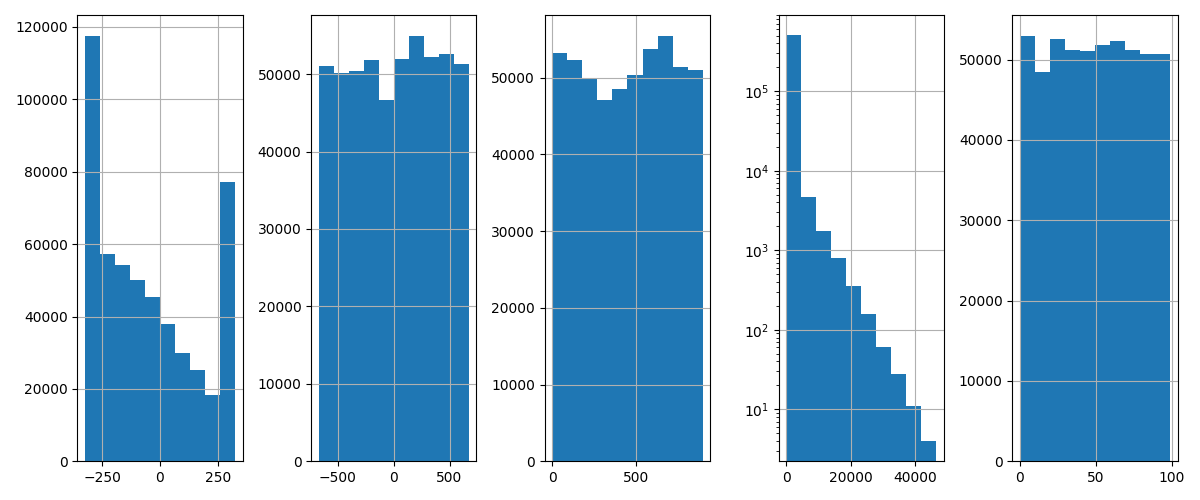

In [61]:
fig, ax = plt.subplots(1,5, figsize=(12,5))

df = first_ides
print(len(df))
df.x.hist(ax=ax[0])
df.y.hist(ax=ax[1])
df.z.hist(ax=ax[2])
df.n_electrons.hist(ax=ax[3], log=True)
df.time.hist(ax=ax[4])
fig.tight_layout()

5128471

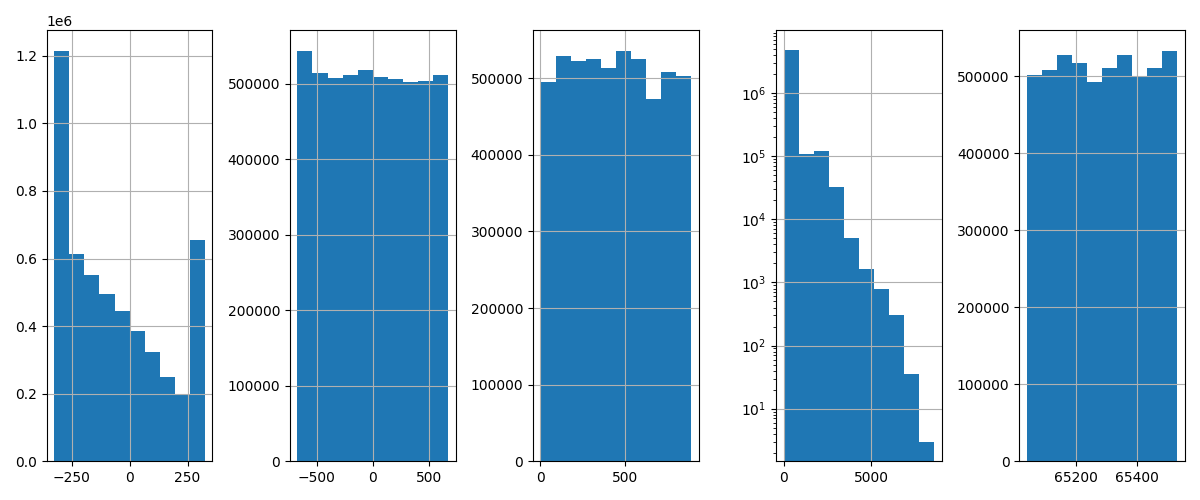

In [62]:
fig, ax = plt.subplots(1,5, figsize=(12,5))

df = weird_ides
print(len(df))
df.x.hist(ax=ax[0])
df.y.hist(ax=ax[1])
df.z.hist(ax=ax[2])
df.n_electrons.hist(ax=ax[3], log=True)
df.time.hist(ax=ax[4])
fig.tight_layout()


In [63]:
tpws.get_waveforms(1)

[1]
1
found 32831 channels
Loading tree into np arrays
Done loading tree into np arrays
Converting np arrays to dataframe
Done converting np arrays to dataframe
Expanding waveforms
Done expanding waveforms


/Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/workspace.py:177: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_waveforms['sample_id'] = np.arange(0, len(df_waveforms))


event       run  subrun     8     9    11    14    24    27    29  ...  \
0       1  20000047       0  7360  7376  7376  7372  7381  7379  7381  ...   
0       1  20000047       0  7362  7372  7372  7365  7379  7373  7382  ...   
0       1  20000047       0  7366  7372  7377  7363  7372  7375  7374  ...   
0       1  20000047       0  7365  7368  7372  7367  7371  7366  7372  ...   
0       1  20000047       0  7368  7370  7376  7369  7366  7367  7372  ...   
..    ...       ...     ...   ...   ...   ...   ...   ...   ...   ...  ...   
0       1  20000047       0  7366  7373  7367  7371  7379  7373  7371  ...   
0       1  20000047       0  7366  7376  7374  7369  7370  7370  7372  ...   
0       1  20000047       0  7363  7376  7372  7376  7370  7368  7368  ...   
0       1  20000047       0  7366  7376  7371  7374  7373  7371  7363  ...   
0       1  20000047       0  7367  7375  7371  7369  7369  7368  7360  ...   

    41463  41464  41465  41466  41467  41468  41469  41470  41471  sample_id  
0    1644   1641   1647   1628   1636   1624   1627   1631   1639          0  
0    1644   1641   1655   1637   1645   1625   1630   1629   1638          1  
0    1638   1634   1642   1639   1649   1634   1638   1630   1634          2  
0    1644   1636   1640   1635   1651   1634   1637   1638   1629          3  
0    1640   1640   1629   1631   1646   1636   1637   1634   1626          4  
..    ...    ...    ...    ...    ...    ...    ...    ...    ...        ...  
0    1649   1630   1636   1640   1629   1630   1638   1630   1641       8495  
0    1647   1626   1638   1645   1626   1631   1638   1629   1651       8496  
0    1638   1633   1648   1651   1626   1642   1629   1636   1658       8497  
0    1638   1644   1654   1655   1630   1653   1619   1636   1659       8498  
0    1633   1637   1645   1646   1632   1658   1615   1642   1645       8499  

[8500 rows x 32835 columns]

In [64]:
from tpvalidator.backtracker import BackTrackerPlotter

tpws.ides = tpws.ides[tpws.ides.time < 8500]
bt = BackTrackerPlotter(tpws, 1)

TypeError: TriggerPrimitivesWorkspace.get_waveforms() takes 2 positional arguments but 3 were given

/Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/utilities.py:215: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplot_mosaic(mosaic, **kwargs)


No waveforms found for event '1'

No waveforms found for event '1'

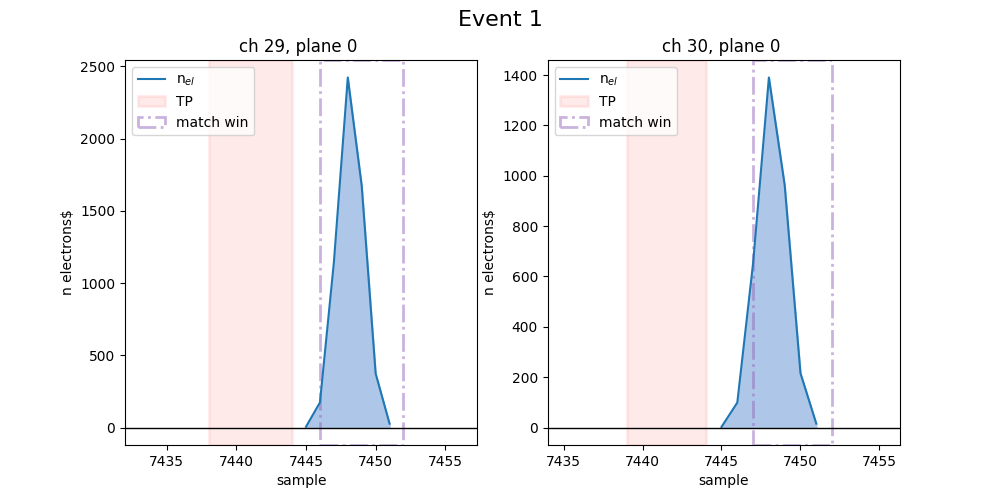

In [ ]:
fig = bt.plot_tps_vs_ides([1,2], figsize=(10,5))
# fig.tight_layout()

No waveforms found for event '1'

No waveforms found for event '1'

No waveforms found for event '1'

No waveforms found for event '1'

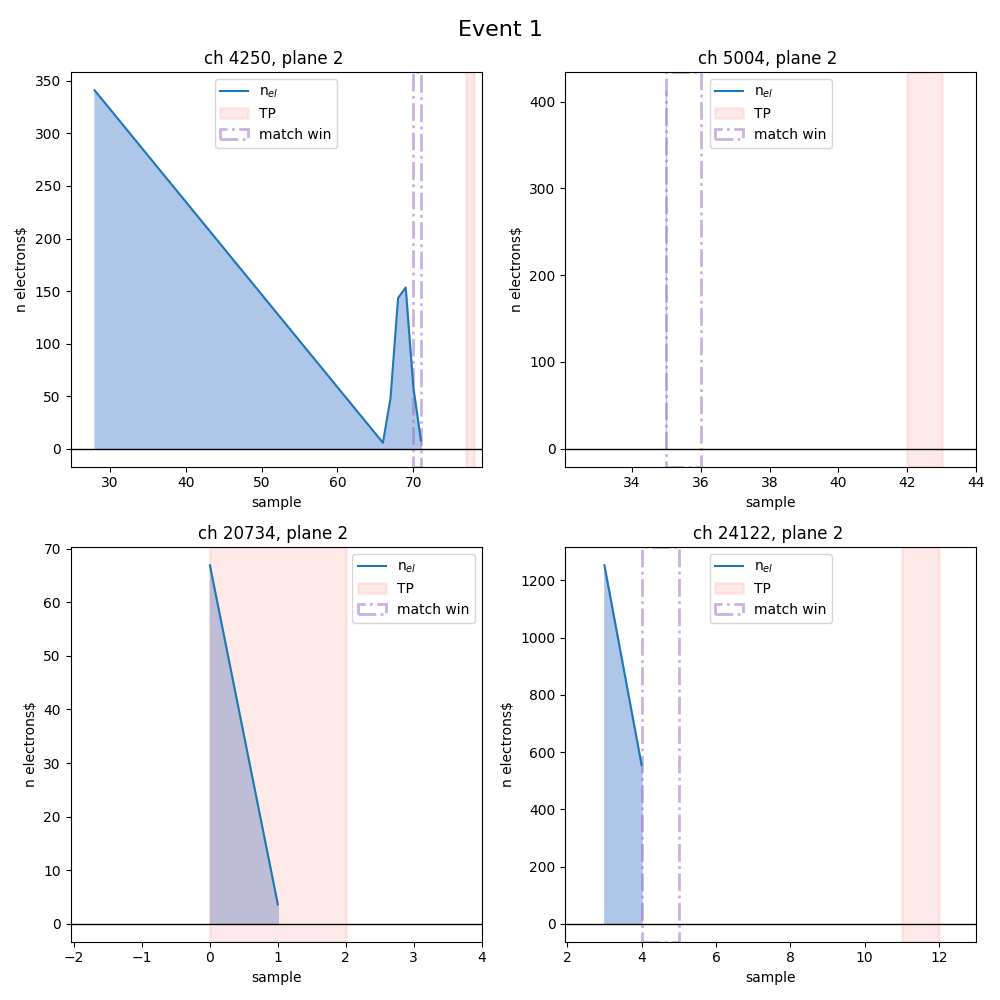

In [ ]:
my_tps = bt.inspect_tps[(bt.inspect_tps.TP_startT < 100) & (bt.inspect_tps.TP_plane == 2)].iloc[:9]
fig = bt.plot_tps_vs_ides(my_tps, figsize=(10,10))
fig.tight_layout()


In [ ]:
my_tps = bt.inspect_tps[(bt.inspect_tps.TP_startT > 100) & (bt.inspect_tps.TP_startT < 200) & (bt.inspect_tps.TP_plane == 2)].iloc[:9]
fig = bt.plot_tps_vs_ides_2g(my_tps, figsize=(10,10))
fig.tight_layout()


AttributeError: 'BackTrackerPlotter' object has no attribute 'plot_tps_vs_ides_2g'

In [ ]:
tpws.waveforms[1]['sample_id'] = np.arange(0, len(tpws.waveforms[1]))


In [ ]:
wf = tpws.waveforms[1]

In [ ]:
wf.iloc[0:100].std()

event         0.000000
run           0.000000
subrun        0.000000
8             4.449254
9             4.355549
               ...    
41468         9.368004
41469         9.349747
41470         9.035083
41471         7.473394
sample_id    29.011492
Length: 32835, dtype: float64

In [ ]:
x = wf.drop(['event', 'run', 'subrun', 'sample_id'], axis=1)

In [ ]:
x

8      9      11     14     24     27     29     30     33     34     ...  \
0    7360   7376   7376   7372   7381   7379   7381   7361   7365   7388  ...   
0    7362   7372   7372   7365   7379   7373   7382   7361   7373   7389  ...   
0    7366   7372   7377   7363   7372   7375   7374   7369   7382   7378  ...   
0    7365   7368   7372   7367   7371   7366   7372   7379   7378   7374  ...   
0    7368   7370   7376   7369   7366   7367   7372   7385   7374   7368  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
0    7366   7373   7367   7371   7379   7373   7371   7373   7368   7381  ...   
0    7366   7376   7374   7369   7370   7370   7372   7372   7373   7380  ...   
0    7363   7376   7372   7376   7370   7368   7368   7374   7373   7381  ...   
0    7366   7376   7371   7374   7373   7371   7363   7377   7376   7371  ...   
0    7367   7375   7371   7369   7369   7368   7360   7380   7375   7368  ...   

    41462  41463  41464  41465  41466  41467  41468  41469  41470  41471  
0    1632   1644   1641   1647   1628   1636   1624   1627   1631   1639  
0    1631   1644   1641   1655   1637   1645   1625   1630   1629   1638  
0    1630   1638   1634   1642   1639   1649   1634   1638   1630   1634  
0    1625   1644   1636   1640   1635   1651   1634   1637   1638   1629  
0    1623   1640   1640   1629   1631   1646   1636   1637   1634   1626  
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
0    1631   1649   1630   1636   1640   1629   1630   1638   1630   1641  
0    1634   1647   1626   1638   1645   1626   1631   1638   1629   1651  
0    1640   1638   1633   1648   1651   1626   1642   1629   1636   1658  
0    1654   1638   1644   1654   1655   1630   1653   1619   1636   1659  
0    1652   1633   1637   1645   1646   1632   1658   1615   1642   1645  

[8500 rows x 32831 columns]

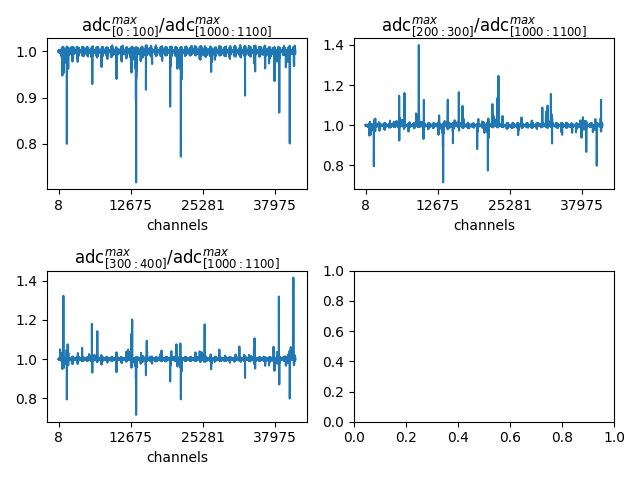

In [ ]:
a = x.iloc[:100].max()
b = x.iloc[200:300].max()
c = x.iloc[300:400].max()
d = x.iloc[1000:1100].max()

fig, ax = plt.subplots(2,2)
ax[0][0].set_title(r'adc$^{max}_{[0:100]}$/adc$^{max}_{[1000:1100]}$')
ax[0][0].set_xlabel('channels')
(a/d).plot(ax=ax[0][0])

ax[0][1].set_title(r'adc$^{max}_{[200:300]}$/adc$^{max}_{[1000:1100]}$')
(b/d).plot(ax=ax[0][1])
ax[0][1].set_xlabel('channels')

ax[1][0].set_title(r'adc$^{max}_{[300:400]}$/adc$^{max}_{[1000:1100]}$')
(c/d).plot(ax=ax[1][0])
ax[1][0].set_xlabel('channels')

fig.tight_layout()

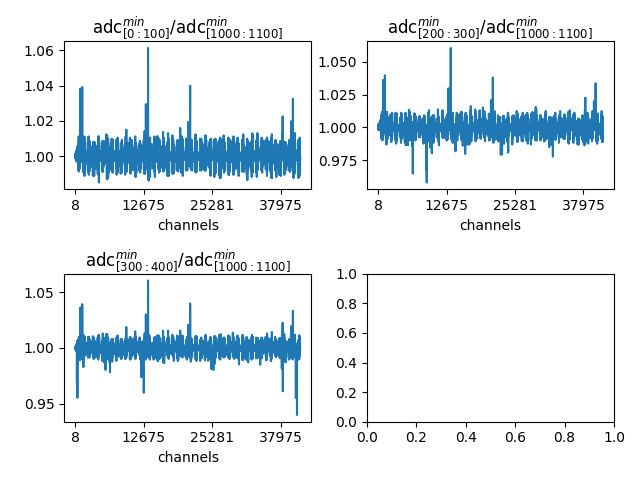

In [ ]:
a = x.iloc[:100].min()
b = x.iloc[200:300].min()
c = x.iloc[300:400].min()
d = x.iloc[1000:1100].min()

fig, ax = plt.subplots(2,2)
ax[0][0].set_title(r'adc$^{min}_{[0:100]}$/adc$^{min}_{[1000:1100]}$')
ax[0][0].set_xlabel('channels')
(a/d).plot(ax=ax[0][0])

ax[0][1].set_title(r'adc$^{min}_{[200:300]}$/adc$^{min}_{[1000:1100]}$')
(b/d).plot(ax=ax[0][1])
ax[0][1].set_xlabel('channels')

ax[1][0].set_title(r'adc$^{min}_{[300:400]}$/adc$^{min}_{[1000:1100]}$')
(c/d).plot(ax=ax[1][0])
ax[1][0].set_xlabel('channels')

fig.tight_layout()

<Axes: >

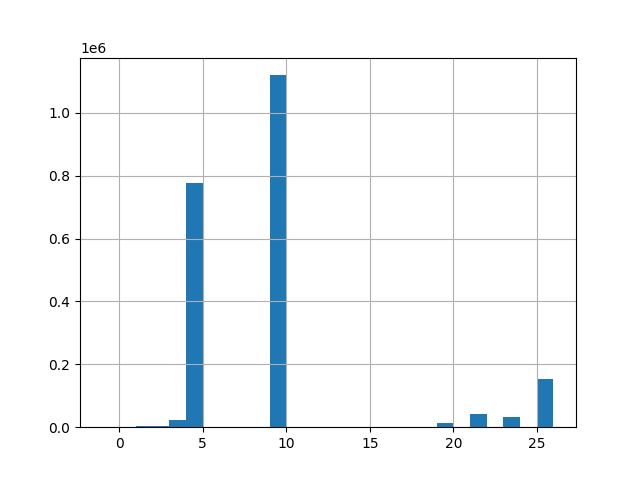

In [ ]:
fig, ax = plt.subplots()


n_bins = len(tpws.tps[tpws.tps.TP_signal == 1].TP_mcgen_key.unique())
bins = [x for x in range(-1, 25+2)]
tpws.tps[tpws.tps.TP_signal == 1].TP_mcgen_key.hist(bins=bins)

In [ ]:
labels = {i:l for i,l in enumerate(tpws.info['mc_generator_labels'])}
labels

{0: 'CavernNGammasAtLAr1x8x6',
 1: 'Rn222ChainBi214GenInLAr',
 2: 'Rn222ChainFromBi214GenInUpperMesh1x8x6',
 3: 'Th232ChainGenInAnode',
 4: 'CavernwallGammasAtLAr1x8x6',
 5: 'Rn222ChainFromPb210GenInUpperMesh1x8x6',
 6: 'Rn222ChainFromPb214GenInUpperMesh1x8x6',
 7: 'Rn222ChainPo218GenInLAr',
 8: 'Rn222ChainPb214GenInLAr',
 9: 'Ar39GenInLAr',
 10: 'Rn222ChainPb210GenInLAr',
 11: 'Rn222ChainFromPo218GenInUpperMesh1x8x6',
 12: 'Rn222ChainFromBi210GenInUpperMesh1x8x6',
 13: 'Ar42GenInLAr',
 14: 'Rn222ChainGenInPDS',
 15: 'K42From42ArGenInLAr',
 16: 'Rn220ChainPb212GenInLAr',
 17: 'CavernwallNeutronsAtLAr1x8x6',
 18: 'K40GenInAnode',
 19: 'U238ChainGenInCathode',
 20: 'Rn222ChainRn222GenInLAr',
 21: 'Th232ChainGenInCathode',
 22: 'K42From42ArGenInUpperMesh1x8x6',
 23: 'foamGammasAtLAr1x8x6',
 24: 'K40GenInCathode',
 25: 'U238ChainGenInAnode',
 26: 'Kr85GenInLAr',
 27: 'CryostatNGammasAtLAr1x8x6',
 28: 'Rn220ChainFromPb212GenInUpperMesh1x8x6'}

In [ ]:
labels = ['noise'] + tpws.info['mc_generator_labels']
bins = [i for i in range(-1, len(tpws.info['mc_generator_labels'])+1)]


<Axes: >

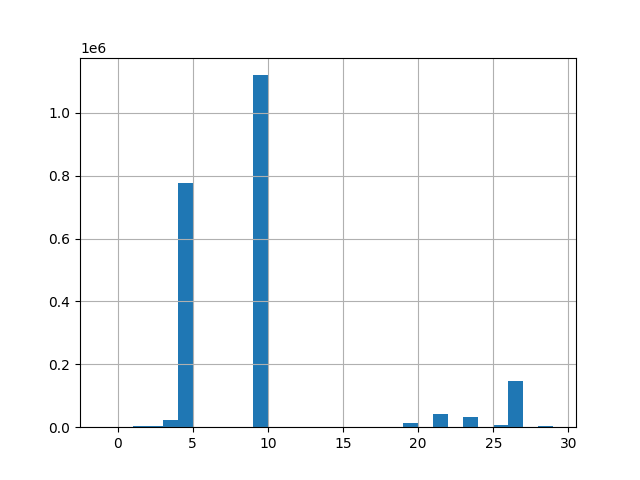

In [ ]:
fig, ax = plt.subplots()

tpws.tps[tpws.tps.TP_signal == 1].TP_mcgen_key.hist(bins=bins)

# plt.xticks([ p+0.5 for p in bins[:-1]], labels)  
# plt.xticks(rotation=60, ha='right')


189

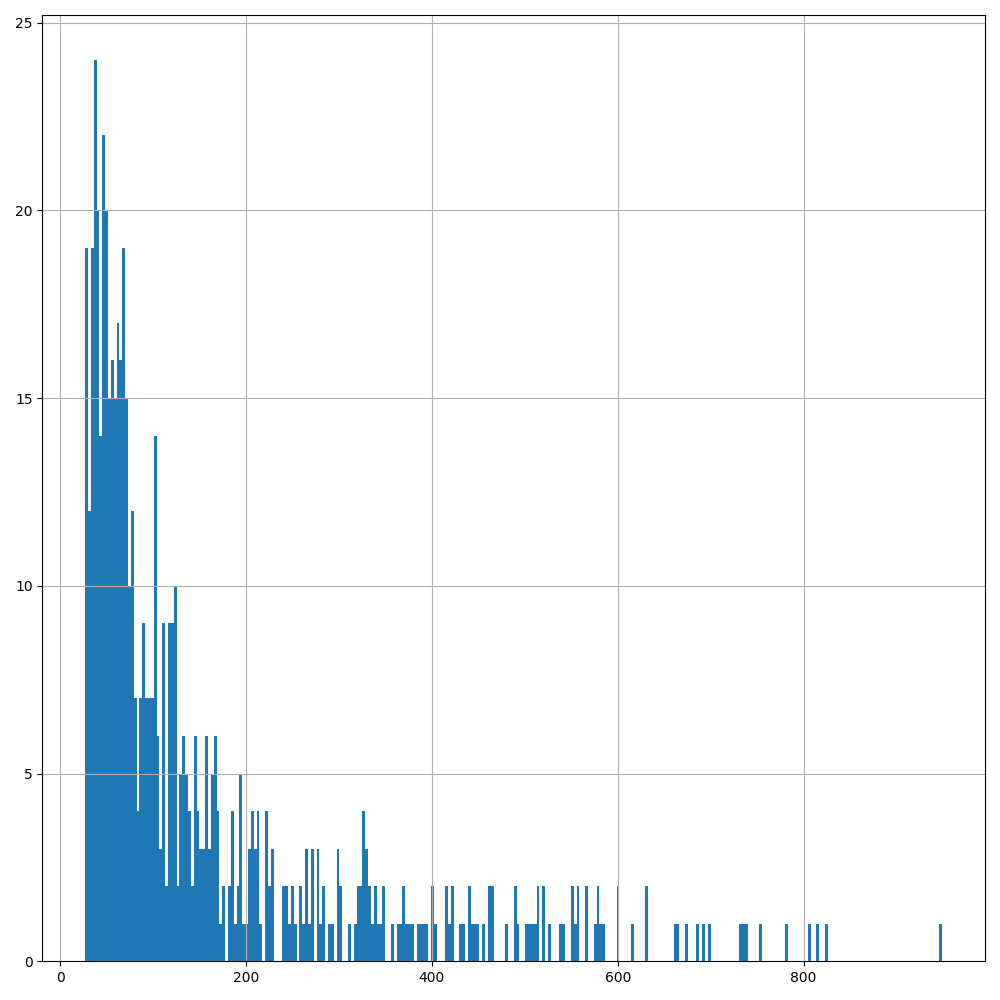

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# tp_ana.tps.sig_p2[tp_ana.tps.sig_p2.TP_mcgen_key == 9].plot.scatter(x='TP_trueX', y='TP_trueZ', s=1, alpha=0.05, ax=ax)
# tp_ana.tps.sig_p2[tp_ana.tps.sig_p2.TP_mcgen_key == 4].plot.scatter(x='TP_trueX', y='TP_trueZ', s=1, alpha=0.05, ax=ax, c='orange')
# tp_ana.tps.sig_p2[tp_ana.tps.sig_p2.TP_mcgen_key == 26].plot.scatter(x='TP_trueX', y='TP_trueZ', s=1, alpha=0.05, ax=ax, c='red')
# tp_ana.tps.sig_p2[tp_ana.tps.sig_p2.TP_n_mcgen > 1].plot.scatter(x='TP_trueX', y='TP_trueZ', s=1, ax=ax)
tp_ana.tps.sig_p2[tp_ana.tps.sig_p2.TP_n_mcgen > 1].TP_peakADC.hist(bins=300)


fig.tight_layout()

len(tp_ana.tps.sig_p2[(tp_ana.tps.sig_p2.TP_n_mcgen > 1) & (tp_ana.tps.sig_p2.TP_peakADC < 60)])

In [ ]:
tpws.rawdigis_events

event
entry       
0          1

In [ ]:
tpws.waveforms

{}